In [ ]:
#Import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
#Loading dataset
titanic = pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Drop cabin(too many missing values)
titanic.drop(columns='Cabin', inplace=True)


In [5]:
#Fill Embarked with mode
titanic['Embarked'] = titanic['Embarked'].fillna(
    titanic['Embarked'].mode()[0]
)


In [ ]:
#Feature engineering(extract title from name)
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

titanic['Title'] = titanic['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major',
     'Rev','Sir','Jonkheer','Dona'], 'Rare'
)
titanic['Title'] = titanic['Title'].replace(['Mlle','Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')


In [7]:
#Smart age imputation(By Title)
titanic['Age'] = titanic.groupby('Title')['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [8]:
#Family features
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1


In [9]:
#Encoding categorical variables
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2})

titanic['Title'] = titanic['Title'].map(
    {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
)
titanic['Title'] = titanic['Title'].fillna(0)


In [10]:
#Droping unnecessary columns
titanic.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)


In [11]:
#Separating features and target
X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']


In [ ]:
#Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [ ]:
#Train Gradient Boosting Model
model = GradientBoostingClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

model.fit(X_train, Y_train)


In [14]:
#Model evaluation(Training accuracy )
train_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_acc)


Training Accuracy: 0.9466292134831461


In [15]:
#(Test accuracy)
test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_pred)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.8491620111731844


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, test_pred)
print(cm)


[[93 12]
 [15 59]]


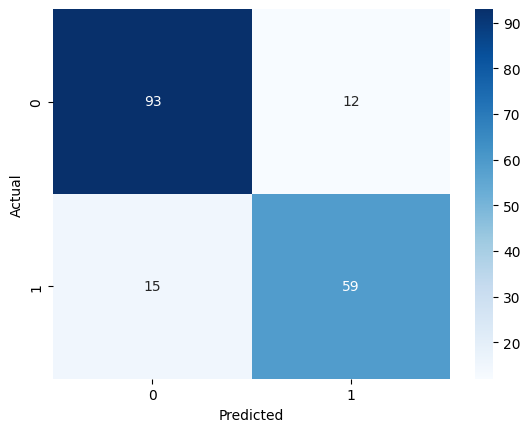

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier   # You can choose any classifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
